## Forced photometry plot
Oct 18

In [93]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def runmed(X,Y,total_bins):
    bins = np.linspace(20,25, total_bins)
    delta = bins[1]-bins[0]
    idx  = np.digitize(X,bins)
    running_median = [np.median(Y[idx==k]) for k in range(total_bins)]
    xr=bins-delta/2
    a=[xr,running_median]
    return a

import scipy.optimize as so
def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

def density_contour(xdata, ydata, nbins_x, nbins_y, color='#bf1d7e',alphaval=1.0,ax=None, **contour_kwargs):
    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1)) 
    pdf = (H*(x_bin_sizes*y_bin_sizes))
 
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    
    levels = [one_sigma,two_sigma]
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    contour = plt.contour(X, Y, Z, levels=levels,linewidths=2,colors=color,alpha=alphaval)
    return contour

def flux2mag(f):
    m=np.zeros_like(f)
    for i in range(len(f)):
        if f[i]>0:
            m[i]=-2.5*np.log10(f[i])+23.9
        else:
            m[i]=-99.0
    return m

In [94]:
a1 = np.genfromtxt('photometry_blend1.txt')
a2 = np.genfromtxt('photometry_blend2.txt')
b1 = np.genfromtxt('photometry_lowres.txt')

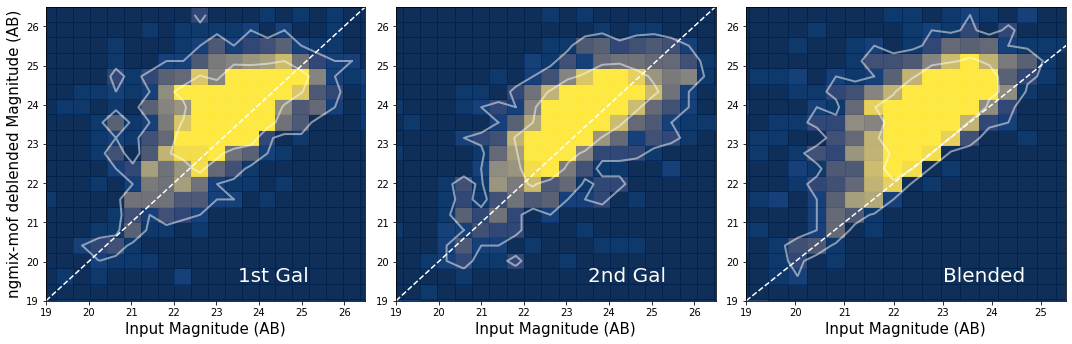

In [139]:
Xl,Yl = flux2mag(b1[:,0]),flux2mag(b1[:,1])
rml=runmed(Xl,Yl,20)
dl=np.median(Yl[Xl<22.0])
bb = 320   

font = {'family' : 'sans-serif',
        'fontname' : 'Times New Roman',
        'size'   : 20}
plt.figure(figsize = (15,5))                              
X,Y = flux2mag(a1[:,0]),flux2mag(a1[:,1])
rm=runmed(X,Y,20)
d=np.median(Y[X<22.0])

plt.subplot(1,3,1)
plt.hist2d(X,Y,vmin=0,vmax=20,bins=[bb,bb],cmap='cividis',zorder=1,alpha=0.94)
plt.plot([19,27],[19,27],'w--')
#plt.scatter(cndmag[star],cndmag[star]-hstmag[star],color='#a3459a',marker='x',zorder=2)
#plt.plot(rm[0],rm[1],color='#04b4b0',linewidth=3,zorder=4)
o=density_contour(X,Y,bb,bb,zorder=3,color='w',alphaval=0.5)
#o=density_contour(Xl,Yl,bb,bb,zorder=3,color='#bf1d7e',alphaval=1.0)
#plt.text(18.3,-0.7,r'$\rm \Delta =$'+str(round(d,2)),**font)
plt.text(23.5,19.5,'1st Gal',color='w',size=20)

plt.xlim([19,26.5])
plt.ylim([19,26.5])
plt.xlabel('Input Magnitude (AB)',size=15)
plt.ylabel('ngmix-mof deblended Magnitude (AB)',size=15)


plt.subplot(1,3,2)
X,Y = flux2mag(a2[:,0]),flux2mag(a2[:,1])
rm=runmed(X,Y,20)
d=np.median(Y[X<22.0])

plt.hist2d(X,Y,vmin=0,vmax=20,bins=[bb,bb],cmap='cividis',zorder=1,alpha=0.94)
plt.plot([19,27],[19,27],'w--')
#plt.scatter(cndmag[star],cndmag[star]-hstmag[star],color='#a3459a',marker='x',zorder=2)
#plt.plot(rm[0],rm[1],color='#04b4b0',linewidth=3,zorder=4)
o=density_contour(X,Y,bb,bb,zorder=3,color='w',alphaval=0.5)
#o=density_contour(Xl,Yl,bb,bb,zorder=3,color='#bf1d7e',alphaval=1.0)
#plt.text(18.3,-0.7,r'$\rm \Delta =$'+str(round(d,2)),**font)
plt.text(23.5,19.5,'2nd Gal',color='w',size=20)

plt.xlim([19,26.5])
plt.ylim([19,26.5])
plt.xlabel('Input Magnitude (AB)',size=15)


plt.subplot(1,3,3)
X,Y = flux2mag(b1[:,0]),flux2mag(b1[:,1])
rm=runmed(X,Y,20)
d=np.median(Y[X<22.0])

plt.hist2d(X,Y,vmin=0,vmax=20,bins=[bb,bb],cmap='cividis',zorder=1,alpha=0.94)
plt.plot([19,27],[19,27],'w--')
plt.text(23,19.5,'Blended',color='w',size=20)
#plt.scatter(cndmag[star],cndmag[star]-hstmag[star],color='#a3459a',marker='x',zorder=2)
#plt.plot(rm[0],rm[1],color='#04b4b0',linewidth=3,zorder=4)
o=density_contour(X,Y,bb,bb,zorder=3,color='w',alphaval=0.5)
#o=density_contour(Xl,Yl,bb,bb,zorder=3,color='#bf1d7e',alphaval=1.0)
#plt.text(18.3,-0.7,r'$\rm \Delta =$'+str(round(d,2)),**font)
  
plt.xlim([19,25.5])
plt.ylim([19,26.5])
plt.xlabel('Input Magnitude (AB)',size=15)
plt.tight_layout()
#plt.ylabel('Measured Magnitude (AB)')
plt.savefig('../plots/photometry.png')